In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis().fit(X,y)
y_pred = model.predict(X)

In [3]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [4]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



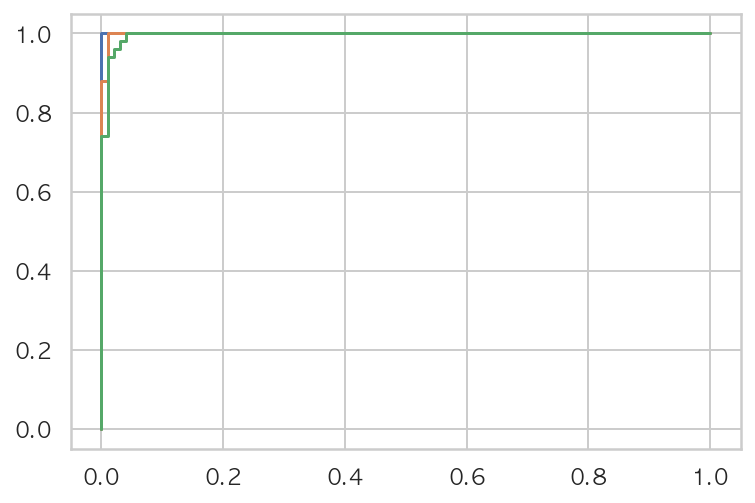

In [5]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3


y_vec = label_binarize(y, [0,1,2]) # 원핫인코딩

for i in range(3):
    model = QuadraticDiscriminantAnalysis().fit(X, y_vec[:, i]) 
    fpr[i], tpr[i], thr[i] = roc_curve(y_vec[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.show()

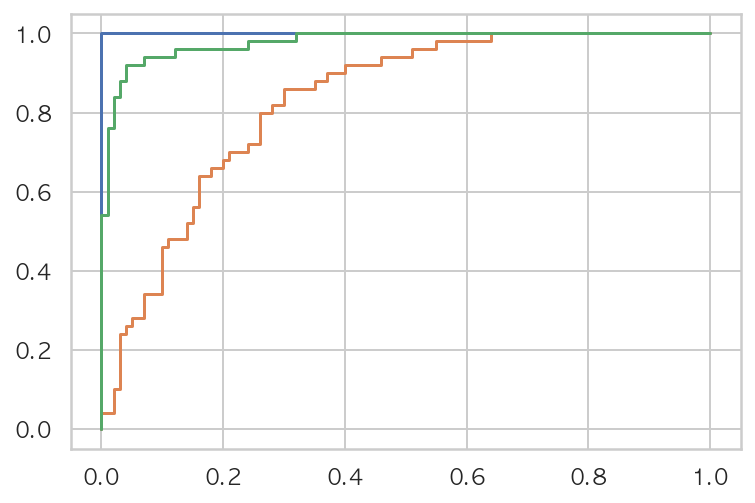

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

for i in range(3):
    model = LinearDiscriminantAnalysis().fit(X, y_vec[:, i]) # OVR문제로 변경.
    fpr[i], tpr[i], thr[i] = roc_curve(y_vec[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.show()